<a href="https://colab.research.google.com/github/JaniRajbongshi/Image-classification-/blob/main/CLASS1011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
data_dir ="/content/drive/MyDrive/projecttech/101_ObjectCategories"

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/projecttech/101_ObjectCategories",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9164 files belonging to 102 classes.
Using 7332 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/projecttech/testds",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1986 files belonging to 102 classes.
Using 397 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 's

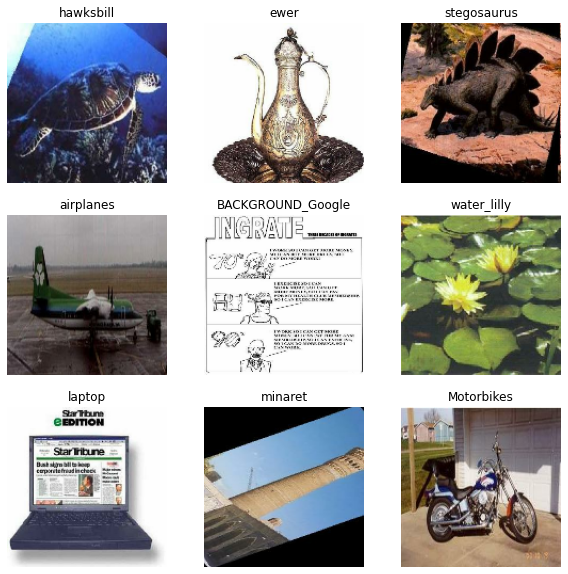

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


230/230 [==============================] - 178s 769ms/step - loss: 3.4347 - accuracy: 0.2915 - val_loss: 2.6367 - val_accuracy: 0.4282
Epoch 2/10
230/230 [==============================] - 175s 762ms/step - loss: 2.2358 - accuracy: 0.4948 - val_loss: 1.6769 - val_accuracy: 0.5995
Epoch 3/10
230/230 [==============================] - 179s 779ms/step - loss: 1.3914 - accuracy: 0.6537 - val_loss: 1.0736 - val_accuracy: 0.7204
Epoch 4/10
230/230 [==============================] - 175s 761ms/step - loss: 0.7385 - accuracy: 0.8066 - val_loss: 0.6683 - val_accuracy: 0.8539
Epoch 5/10
230/230 [==============================] - 177s 771ms/step - loss: 0.3042 - accuracy: 0.9198 - val_loss: 0.7013 - val_accuracy: 0.8589
Epoch 6/10
230/230 [==============================] - 179s 778ms/step - loss: 0.1592 - accuracy: 0.9543 - val_loss: 0.7220 - val_accuracy: 0.8816
Epoch 7/10
230/230 [==============================] - 179s 780ms/step - loss: 0.1204 - accuracy: 0.9709 - val_loss: 0.7119 - val_accura

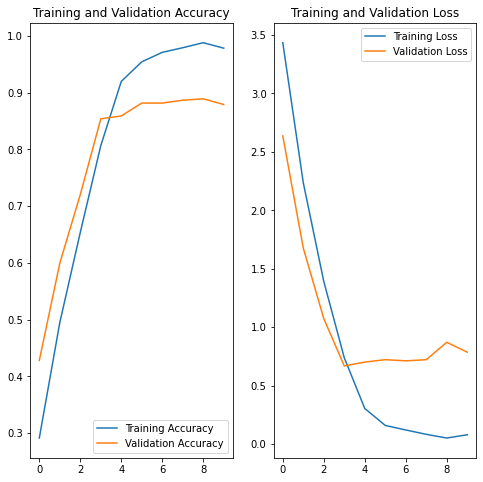

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

path = "/content/drive/MyDrive/projecttech/101_ObjectCategories/Motorbikes/image_0022.jpg"
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {}"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
plt.figure()
plt.axis("off")
plt.title(class_names[np.argmax(score)])
plt.imshow(img)
plt.show()



NameError: ignored

In [ ]:
from os import listdir

folder_di="/content/drive/MyDrive/projecttech/101_ObjectCategories"
folder_dir=os.path.join(folder_di,class_names[np.argmax(score)])

for images in os.listdir(folder_dir):
  if(images.endswith(".jpg")):

      pathres = os.path.join(folder_dir,images)

      img = tf.keras.utils.load_img(
      pathres, target_size=(150,150))
      plt.figure()
      plt.axis("off")
      plt.imshow(img)
      plt.show()




In [ ]:
import pickle
filename= 'techathontest1'
pickle.dump(model,open(filename,'wb'))

NameError: ignored